## Objective

The objective of this notebook is to solve the second programming assignment of Andrew Ng's Machine Learning course on Coursera using Python. I have also taken a snapshot of the important concepts relating to the topics taught in this week that I'll be pasting in my notebook. 

In [1]:
from IPython.display import Image

## Hypothesis Overview

If we use Linear Regression for classification, some of the problems that may arise are:
- high leverage points (points that have extreme or unusual x values) will compromise the fit of the regression model and we will end up with a bad hypothesis for predicting our 0 and 1 classes
- classification problems have a discrete number of outcomes, thus it is important that our hypothesis outputs values that are between 0 and 1, so that we can use some thresholding scheme to predict 0s and 1s. In Linear Regression, this may not be observed as our model can output values that are lesser than 0 and greater than 1

![title](Logistic Regression Hypothesis.png)

![title](LR Probabilities.png)

This is obviously only true for binary classification. For multi-class classification, we will have as many as probabilities as the number of classes

![title](LR Decision Boundary.png)

## Cost Function Overview 

Now we can't use the same cost function as Linear Regression as the logit function will cause the output to be wavy

![title](LR Cost Function 1.png)

![title](LR Cost Function 2.png)

The intuition behind doing this is that if we misclassify our observation, then we impose a heavy penalty on the model. The more our hypothesis is off from y, the larger the cost. Here the hypothesis is g(z) or sigmoid(z)
- If our correct answer 'y' is 0, then the cost function will be 0 if our hypothesis function also outputs 0. If our hypothesis approaches 1, then the cost function will approach infinity.
- If our correct answer 'y' is 1, then the cost function will be 0 if our hypothesis function outputs 1. If our hypothesis approaches 0, then the cost function will approach infinity.

Note that writing the cost function in this way guarantees that J(θ) is convex for logistic regression. Compressing these two cases :-

![title](LR Cost Function Final.png)

Note that when y=1, the second term is 0 and when y=0, the first term is 0. X is the design matrix and the thetas are the weights which we need to optimize

## Reading and plotting the data 

In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#To read the data
data = pd.read_csv('ex2data1.csv',header=None)
data.columns=['Exam1','Exam2','Admitted']
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


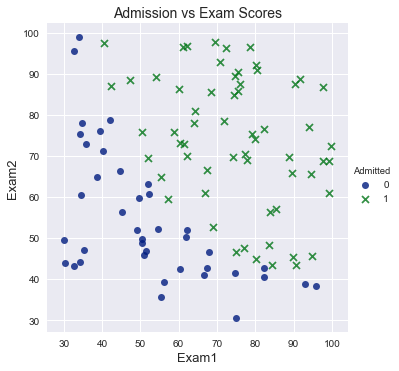

In [4]:
#Plotting the data
plt.figure(figsize=(13,8))
sns.lmplot(x='Exam1',y='Exam2',hue='Admitted',markers=['o','x'],palette='dark',data=data,fit_reg=False)
plt.title('Admission vs Exam Scores',size=14)
plt.xlabel('Exam1',size=13)
plt.ylabel('Exam2',size=13)

A classifier with a linear decision boundary would do a very good job of seperating the 1s and 0s here. However a slightly curved decision boundary would probably be perfect

In [5]:
#To define the X and y values
X=data[['Exam1','Exam2']]
y=data['Admitted']

#To add an additional column. Why is it needed? Since we're trying to perform matrix multiplications, it is 
#necessary that the conditions for matrix multiplication are satisfied. Since theta 0 doesn't have a 
#corresponding column in X, to be consistent we need to have an additional column that only has ones
X0=pd.Series(np.ones(len(y)),name='X0')
X = pd.concat([X0,X],axis=1)

X=X.values #To convert from a dataframe to a 2D array
y=y.reshape(y.shape[0],1) #to convert from a Pandas series to a 2D array
theta=np.zeros(X.shape[1]) #Initial value of theta

## Sigmoid Function

In [6]:
def SIGMOID(z):
    #Using np.exp is beneficial as it does the operation in a vectorised manner
    return(1/(1+np.exp(-z)))

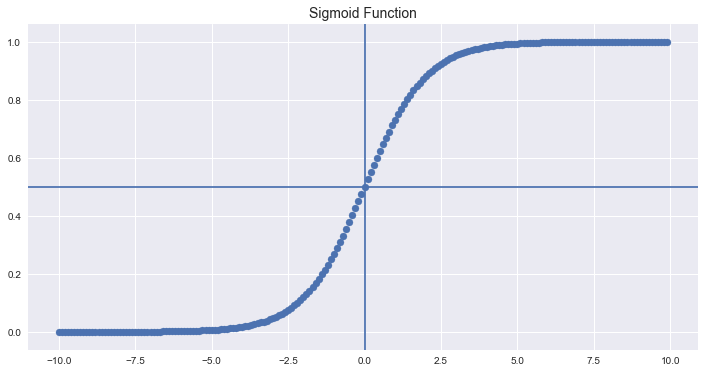

In [7]:
#To plot the sigmoid function
plt.figure(figsize=(12,6))
plt.title('Sigmoid Function',size=14)
plt.scatter(x=np.arange(-10,10,0.1),y=SIGMOID(np.arange(-10,10,0.1)))
plt.axvline(x=0)
plt.axhline(y=0.5)

As you can see, for higher values of X, our hypothesis or g(z) asymptotes at 1. Similar behaviour is also expected at negative values of X, however in this case, the hypothesis asymptotes at 0. Thus through such a hypothesis function, the problem of dealing with high leverage points is solved. Also, the logistic regression model is a linear classifier BUT it is modelling the probabilities on a non-linear scale.

## Cost Function 

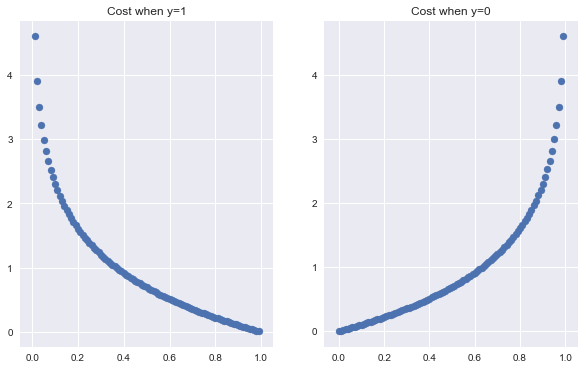

In [8]:
#Costs associated with misclassification
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Cost when y=1',size=12)
plt.scatter(x=np.arange(0,1,0.01),y=-np.log(np.arange(0,1,0.01)))

plt.subplot(1,2,2)
plt.title('Cost when y=0',size=12)
plt.scatter(x=np.arange(0,1,0.01),y=-np.log(1-np.arange(0,1,0.01)))

In [9]:
def COST(theta,X,y):
    m=X.shape[0]
    n=X.shape[1]
    theta=theta.reshape(n,1)
    hypothesis=SIGMOID(np.dot(X,theta))
    J=(-1/m)*((np.dot(np.transpose(y),np.log(hypothesis)))+
              (np.dot((1-np.transpose(y)),np.log(1-hypothesis))))
    return(J.flatten()[0])
COST(np.zeros(3),X,y)

0.69314718055994518

Explanation:

- The COST function calculates the cost of our logistic regression classifier with respect to the thetas (parameters)
- m is the number of rows in the design matrix (X)
- n is the number of features in the original X plus 1
- We first take a dot product of our X and theta (initial values set to 0). X is an (m x n) dimensional matrix, theta is a n dimensional vector. The result of the dot product gives us an m dimensional vector (our hypothesis)
- y is the label which is an m dimesnional vector 
- We then take the transpose of y which becomes a (1 x m) matrix and then take the dot product of this transpose with the log of the hypothesis (m x 1) matrix
- The result gives us our cost for y=1. We do the exact same operation for cost when y=0 as well and add the two terms
- This kind of vectorised implementation is less cluttered and efficient

## Gradient of the Cost Function 

In [10]:
def GRAD(theta,X,y):
    m=X.shape[0]
    n=X.shape[1]
    theta=theta.reshape(n,1)
    hypothesis=SIGMOID(np.dot(X,theta))
    grad=(1/m)*np.dot(np.transpose(X),(hypothesis-y))
    return(grad.flatten())
GRAD(np.zeros(3),X,y)

array([ -0.1       , -12.00921659, -11.26284221])

Explanation:

- The GRAD function calculates the gradient of the cost function
- The gradient looks similar to the gradient of the linear regression cost function, however the key difference in the hypothesis
- We take a transpose of X, so that we get a (n x m) dimensional matrix
- (hypotheis - y) is an (m x 1) dimensional matrix
- The result of the dot product of the two gives us an n dimensional vector, that comes in handy in updating the value of theta

In [11]:
def GRADIENTDESCENT(X,y,alpha,iterations,theta):
    COSTS=[]
    THETAS=[]
    m=X.shape[0]
    n=X.shape[1]
    theta=theta.reshape(n,1)
    for i in range(iterations):
        theta=theta-((alpha/m)*GRAD(X,y,theta).reshape(n,1))
        COSTS.append(COST(X,y,theta))
        THETAS.append(theta)
    return(min(COSTS),THETAS[COSTS.index(min(COSTS))])

## Optimization and Prediction 

In [12]:
#Using the scipy's optimize module, we make use of Truncated Newton Method to optimize our thetas. Note : It is
#important that the parameters passed in the COST and GRAD function are in the order - theta, X and y. You could
#spend hours debugging the error if the parameters are not in that order
import scipy.optimize as opt
result = opt.fmin_tnc(func=COST, x0=theta, fprime=GRAD, args=(X, y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [13]:
#Using this value of theta, the lowest value of the COST function that we found out was 0.203 
COST(result[0],X,y)

0.20349770158947461

In [14]:
#To make predictions
def predict(final_theta,X,threshold):
    final_theta=final_theta.reshape(final_theta.shape[0],1)
    prediction=SIGMOID(np.dot(X,final_theta)) 
    prediction=np.where(prediction>=threshold,1,0) #To code everything greater than or equal to threshold as 1
    return(prediction)

In [15]:
#To compute the final accuracy
print('The accuracy of the classifier is',np.mean(predict(result[0],X,0.5)==y)*100,'%')

The accuracy of the classifier is 89.0 %


## Regularization

![title](Regularization.png)

In [16]:
#To read the data
data_reg = pd.read_csv('ex2data2.csv',header=None)
data_reg.columns=['Test1','Test2','Accepted']
data_reg.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


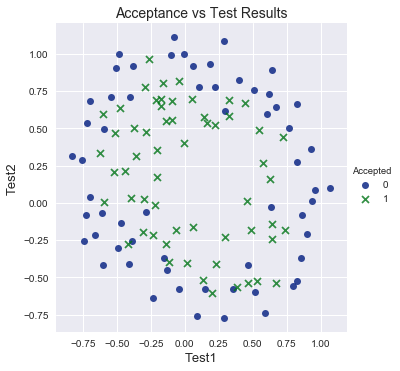

In [17]:
#Plotting the data
plt.figure(figsize=(13,8))
sns.lmplot(x='Test1',y='Test2',hue='Accepted',markers=['o','x'],palette='dark',data=data_reg,fit_reg=False)
plt.title('Acceptance vs Test Results',size=14)
plt.xlabel('Test1',size=13)
plt.ylabel('Test2',size=13)

It is very much apparent that a linear decision boundary won't do a good job of sperating the 1s and 0s here. We need a more complex hypothesis that has a circular decision boundary. Hence we may need higher order terms

In [18]:
#To define the X and y values
X=data_reg[['Test1','Test2']]
y=data_reg['Accepted']

In [19]:
#We could have implemented this function by running 2 for loops, but since the focus is on building the
#algorithms, we will use a readymade function for finding Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
polynomial=PolynomialFeatures(6)
X=polynomial.fit_transform(X)

In [20]:
#The PolynomialFeatures function has also inserted a column of ones into the design matrix
X.shape

(118, 28)

In [21]:
#To convert y into a numpy array
y=y.reshape(y.shape[0],1)

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

While the feature mapping allows us to build a more expressive classifer, it also more susceptible to overfitting. We need to make sure that regularization helps our cause here and we only penalize those terms that are not useful (however this is done by optimization)

## Regularized Cost Function and Gradient

![title](Regularized Cost Function.png)

This is the cost function for linear regression. The lambda is the regularization parameter. A lambda value extremely high could result in all our parameters being minimized to 0 and this results in high bias and underfitting. On the other hand, a lambda value too small, will result in our hypothesis overfitting/badly fitting to the data

![title](LR Regularized Cost Func.png)

In [22]:
def COSTREG(theta,X,y,lam):
    m=X.shape[0]
    n=X.shape[1]
    theta=theta.reshape(n,1)
    hypothesis=SIGMOID(np.dot(X,theta))
    J=(-1/m)*((np.dot(np.transpose(y),np.log(hypothesis)))+
              (np.dot((1-np.transpose(y)),np.log(1-hypothesis))))+(lam/(2*m))*np.sum(np.square(theta[1:]))
    return(J.flatten()[0])

Explanation:

- The COSTREG function calculates the regularized cost of our logistic regression classifier with respect to the thetas (parameters)
- m is the number of rows in the design matrix (X)
- n is the number of features in the original X plus 1
- we first take a dot product of our X and theta (initial values set to 0). X is an (m x n) dimensional matrix, theta is a n dimensional vector. The result of the dot product gives us an m dimensional vector (our hypothesis)
- y is the label which is an m dimesnional vector 
- We then take the transpose of y which becomes a (1 x m) matrix and then take the dot product of this transpose with the log of the hypothesis (m x 1) matrix
- The result gives us our cost for y=1. We do the exact same operation for cost when y=0 as well and add the two terms
- However in this case, we also have our regularization parameter lambda. We don't regularize the zeroth theta which is our intercept term. We square and sum over all other terms
- The result of these operations gives us our final cost which we try to minimze with respect to theta

![title](LR Regularized Gradient.png)

Everything that comes within the square brackets is the gradient of the cost function

In [23]:
def GRADREG(theta,X,y,lam):
    m=X.shape[0]
    n=X.shape[1]
    theta=theta.reshape(n,1)
    hypothesis=SIGMOID(np.dot(X,theta))
    grad=(1/m)*(np.dot(np.transpose(X),(hypothesis-y)))+np.insert((lam/m)*(theta[1:]),0,0).reshape(n,1)
    return(grad.flatten())

Explanation:

- The GRADREG function calculates the gradient of the regularized cost function
- The gradient looks similar to the gradient of the linear regression cost function, however the key difference in the hypothesis
- We take a transpose of X, so that we get a (n x m) dimensional matrix
- (hypotheis - y) is an (m x 1) dimensional matrix
- The result of the dot product of the two gives us an n dimensional vector, that comes in handy in updating the value of theta.
- However in this case, we also have our regularization parameter lambda. We don't regularize the zeroth theta which is our intercept term
- We multiply all our thetas starting from index 1 by lambda/m
- Since the zeroth term in theta is exempt from regularization, we need to set it to zero in the second half of the equation to be consistent with the dimensions for which we use the np.insert function. DON'T SET IT TO theta[0] as this will mean that after every iteration of an optimization algorithm, theta[0] at the end of the previous iteration will get added to theta[0] of the new iteration

In [24]:
#Cost and gradient with thetas all initialised to zeros and lambda=1
print('Cost:',COSTREG(np.zeros(28),X,y,1))
print('First five gradients:',GRADREG(np.zeros(28),X,y,1)[:5])

Cost: 0.69314718056
First five gradients: [  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02]


In [25]:
#Cost and gradient with thetas all initialised to ones and lambda=10
print('Cost:',COSTREG(np.ones(28),X,y,10))
print('First five gradients:',GRADREG(np.ones(28),X,y,10)[:5])

Cost: 3.16450933162
First five gradients: [ 0.34604507  0.16135192  0.19479576  0.22686278  0.09218568]


## Optimization and Prediction 

In [26]:
#Using the scipy's optimize module, we make use of Truncated Newton Method to optimize our thetas. Note : It is
#important that the parameters passed in the COST and GRAD function are in the order - theta, X and y. You could
#spend hours debugging the error if the parameters are not in that order
result_reg = opt.fmin_tnc(func=COSTREG, x0=np.zeros(28), fprime=GRADREG, args=(X,y,1))
result_reg

(array([ 1.27271029,  0.62529966,  1.18111687, -2.01987401, -0.91743189,
        -1.43166935,  0.12393225, -0.36553118, -0.35725406, -0.17516292,
        -1.4581701 , -0.05098417, -0.61558558, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603302, -0.04466176, -0.27778947, -0.29539513,
        -0.45645981, -1.04319154,  0.02779374, -0.29244864,  0.01555759,
        -0.32742404, -0.14389149, -0.92467487]), 32, 1)

In [27]:
#To compute the final accuracy
print('The accuracy of the classifier is',np.mean(predict(result_reg[0],X,0.5)==y)*100,'%')

The accuracy of the classifier is 83.0508474576 %
